### Bike Sharing - Kaggle competition

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
import math

In [90]:
path = os.getcwd()
path1 = path + '\\data\\train.csv'
path2 = path + '\\data\\test.csv'

train = pd.read_csv(path1)
test = pd.read_csv(path2)

train.head() # Target variable is count

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [94]:
if 'season' in train: # So we can re-run this notebook line without giving errors
    
    seasons = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Autumn'}
    months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
    weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    weather = {1:'Clear', 2:'Cloudy', 3:'Light Precipitation', 4:'Heavy Precipitation'}
    
    # Preprocessing train data
    train['datetime'] = pd.DatetimeIndex(train['datetime'])
    timesTrain = pd.DatetimeIndex(train['datetime'])
    train['year'] = timesTrain.year
    train['hour'] = timesTrain.hour
    train['twilight_0am-5am'] = np.where(train['hour']<=5, 1, 0) # Didnt influence score, should remove it
    train['morning_6am-12pm'] = np.where(((train['hour']>5) & (train['hour']<=12)), 1, 0)
    train['afternoon_12pm-6pm'] = np.where(((train['hour']>12) & (train['hour']<=18)), 1, 0)
    train['evening_7pm-11pm'] = np.where(((train['hour']>18) & (train['hour']<=23)), 1, 0)
    train['month'] = timesTrain.month
    train['day'] = timesTrain.day
    train['weekday'] = timesTrain.weekday
    train['season'] = train['season'].map(seasons)
    train['month'] = train['month'].map(months)
    train['weekday'] = train['weekday'].map(weekdays)
    train['weather'] = train['weather'].map(weather)
    #train = train.set_index('datetime')
    #workday_tomorrow_train = train[['workingday', 'day', 'hour']]
    #workday_tomorrow_train = workday_tomorrow_train.drop(workday_tomorrow_train.index[0:24]).reset_index().drop(labels=['index'], axis=1)
    #train = pd.concat([train, work_day_tomorrow_train.rename(columns={'workingday':'work_tomorrow'})], axis=1)
    train = pd.concat([train, pd.get_dummies(train['year']), pd.get_dummies(train['season']), pd.get_dummies(train['month']), pd.get_dummies(train['hour']), pd.get_dummies(train['weekday']), pd.get_dummies(train['weather'])], axis=1)
    train = train.drop(labels=['year', 'season', 'month', 'weekday', 'weather', 'day', 'atemp'],axis=1) # Dropping columns not present in test df and duplicated
    train = train.dropna()
    
    # Preprocessing test data
    timesTest = pd.DatetimeIndex(test['datetime'])
    test['year'] = timesTest.year
    test['hour'] = timesTest.hour
    test['month'] = timesTest.month
    test['day'] = timesTest.day
    test['weekday'] = timesTest.weekday
    test['season'] = test['season'].map(seasons)
    test['month'] = test['month'].map(months)
    test['weekday'] = test['weekday'].map(weekdays)
    test['weather'] = test['weather'].map(weather)
    #test = test.set_index('datetime')
    #workday_tomorrow_test = test[['workingday', 'day', 'hour']]
    #workday_tomorrow_test = workday_tomorrow_test.drop(workday_tomorrow_test.index[0:24]).reset_index().drop(labels=['index'], axis=1)
    #test = pd.concat([test, workday_tomorrow_test.rename(columns={'workingday':'work_tomorrow'})], axis=1)
    test = pd.concat([test, pd.get_dummies(test['year']), pd.get_dummies(test['season']), pd.get_dummies(test['month']), pd.get_dummies(test['hour']), pd.get_dummies(test['weekday']), pd.get_dummies(test['weather'])], axis=1)
    test = test.drop(labels=['year', 'season', 'month', 'weekday', 'weather','day', 'atemp'], axis=1)
    test = train.dropna()
    
# Include work_tomorrow, work_yesterday,and use the casual & registered infos in the dataset    

train.to_csv(path + "\\data\\bike_sharing_dashboard_data.csv")
train.to_json(path + "\\data\\bike_sharing_dashboard_data.json",orient='records')

train.head()

,datetime,holiday,workingday,temp,humidity,windspeed,casual,registered,count,hour,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Cloudy,Heavy Precipitation,Light Precipitation
0,2011-01-01 00:00:00,0,0,9.84,81,0.0,3,13,16,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2011-01-01 01:00:00,0,0,9.02,80,0.0,8,32,40,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2011-01-01 02:00:00,0,0,9.02,80,0.0,5,27,32,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011-01-01 03:00:00,0,0,9.84,75,0.0,3,10,13,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-01-01 04:00:00,0,0,9.84,75,0.0,0,1,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Notes on EDA and certain design choices in feature engineering

1. Most important features were extracted from datetime, of which hour was by far the most important. Weekday also plays a role.
2. Day of the month made no difference on linear regression and led to overfitting on random forests, so it was dropped.
3. Atemp seemed to overfit the dataset since it is highly correlated with temp, also removed.
4. Predicting casual and registered separately and summing them yields slightly better forescasts.

In [57]:
# C = casual, R = registered, T = Total

lrg_C = linear_model.LinearRegression()
lrg_R = linear_model.LinearRegression()
lrg_T = linear_model.LinearRegression()

rf_C = RandomForestClassifier(n_estimators=20)
rf_R = RandomForestClassifier(n_estimators=20)
rf_T = RandomForestClassifier(n_estimators=20)

In [58]:
y_T = train[['casual', 'registered', 'count']]

X = train.drop(labels=['count', 'casual', 'registered'], axis=1)

In [59]:
X_T_train, X_T_test, y_T_train, y_T_test = cross_validation.train_test_split(X, y_T, test_size=0.4, random_state=0)

y_C_train = y_T_train['casual']
y_C_test = y_T_test['casual']

y_R_train = y_T_train['registered']
y_R_test = y_T_test['registered']

y_count_train = y_T_train['count']
y_count_test = y_T_test['count']

In [60]:
lrg_C.fit(X_T_train ,y_C_train)
rf_C.fit(X_T_train, y_C_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
lrg_R.fit(X_T_train ,y_R_train)
rf_R.fit(X_T_train, y_R_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
lrg_T.fit(X_T_train ,y_count_train)
rf_T.fit(X_T_train, y_count_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
## CASUAL

predict_train_lrg_C = lrg_C.predict(X_T_test)
predict_train_rf_C = rf_C.predict(X_T_test)
predict_train_lrg_C = np.maximum(predict_train_lrg_C, 0.0) # Forcing predictions to give 0 whenever linear regression fits into negative
print("LR, C, Residual sum of squares: %.2f" % np.mean((predict_train_lrg_C - y_C_test) ** 2))
print("RF, C, Residual sum of squares: %.2f" % np.mean((predict_train_rf_C - y_C_test) ** 2))

print("")

## REGISTERED

predict_train_lrg_R = lrg_R.predict(X_T_test)
predict_train_rf_R = rf_R.predict(X_T_test)
predict_train_lrg_R = np.maximum(predict_train_lrg_R, 0.0) # Forcing predictions to give 0 whenever linear regression fits into negative
print("LR, R, Residual sum of squares: %.2f" % np.mean((predict_train_lrg_R - y_R_test) ** 2))
print("RF, R, Residual sum of squares: %.2f" % np.mean((predict_train_rf_R - y_R_test) ** 2))

print("------------------------------")

predict_train_lrg_T = predict_train_lrg_C + predict_train_lrg_R
predict_train_rf_T = predict_train_rf_C + predict_train_rf_R
y_T_test = y_C_test + y_R_test

print("LR, T, Residual sum of squares: %.2f" % np.mean((predict_train_lrg_T - y_T_test) ** 2))
print("RF, T, Residual sum of squares: %.2f" % np.mean((predict_train_rf_T - y_T_test) ** 2))

print("")
print("Model fit together below")
print("")

predict_train_lrg_count = lrg_T.predict(X_T_test)
predict_train_rf_count = rf_T.predict(X_T_test)
predict_train_lrg_count = np.maximum(predict_train_lrg_count, 0.0) # Forcing predictions to give 0 whenever linear regression fits into negative

print("LR, Count, Residual sum of squares: %.2f" % np.mean((predict_train_lrg_count - y_count_test) ** 2))
print("RF, Count, Residual sum of squares: %.2f" % np.mean((predict_train_rf_count - y_count_test) ** 2))


LR, C, Residual sum of squares: 937.57
RF, C, Residual sum of squares: 674.50

LR, R, Residual sum of squares: 6718.49
RF, R, Residual sum of squares: 6417.84
------------------------------
LR, T, Residual sum of squares: 9672.13
RF, T, Residual sum of squares: 7660.90

Model fit together below

LR, Count, Residual sum of squares: 9708.85
RF, Count, Residual sum of squares: 8172.14


In [64]:
## CASUAL

print('LR, C, R-squared score: %.3f' % r2_score(y_C_test, predict_train_lrg_C))
print('RF, C, R-squared score: %.3f' % r2_score(y_C_test, predict_train_rf_C))

print("")

## REGISTERED

print('LR, R, R-squared score: %.3f' % r2_score(y_R_test, predict_train_lrg_R))
print('RF, R, R-squared score: %.3f' % r2_score(y_R_test, predict_train_rf_R))

print("")
print("------------------------------")
print("")

print('LR, T, R-squared score: %.3f' % r2_score(y_T_test, predict_train_lrg_T))
print('RF, T, R-squared score: %.3f' % r2_score(y_T_test, predict_train_rf_T))

print("")
print("Model fit together below")
print("")

print('LR, count, R-squared score: %.3f' % r2_score(y_count_test, predict_train_lrg_count))
print('RF, count, R-squared score: %.3f' % r2_score(y_count_test, predict_train_rf_count))


LR, C, R-squared score: 0.633
RF, C, R-squared score: 0.736

LR, R, R-squared score: 0.696
RF, R, R-squared score: 0.710

------------------------------

LR, T, R-squared score: 0.700
RF, T, R-squared score: 0.763

Model fit together below

LR, count, R-squared score: 0.699
RF, count, R-squared score: 0.747


In [65]:
def rmsle(y_actual, y_pred):
    sle = (np.log(np.array(y_actual)+1) - np.log(np.array(y_pred)+1))**2
    rmsle =  np.sqrt((sle**2).mean())
    return rmsle

In [66]:
## CASUAL

print("LR, C, Root Mean Squared Log Error, RMSLE: %.2f" % rmsle(y_C_test, predict_train_lrg_C))
print("RF, C, Root Mean Squared Log Error, RMSLE: %.2f" % rmsle(y_C_test, predict_train_rf_C))

print("")

print("LR, R, Root Mean Squared Log Error, RMSLE: %.2f" % rmsle(y_R_test, predict_train_lrg_R))
print("RF, R, Root Mean Squared Log Error, RMSLE: %.2f" % rmsle(y_R_test, predict_train_rf_R))

print("")
print("------------------------------")
print("")

print("LR, T, Root Mean Squared Log Error, RMSLE: %.2f" % rmsle(y_T_test, predict_train_lrg_T))
print("RF, T, Root Mean Squared Log Error, RMSLE: %.2f" % rmsle(y_T_test, predict_train_rf_T))

print("")
print("Model fit together below")
print("")

print("LR, count, Root Mean Squared Log Error, RMSLE: %.2f" % rmsle(y_count_test, predict_train_lrg_count))
print("RF, count, Root Mean Squared Log Error, RMSLE: %.2f" % rmsle(y_count_test, predict_train_rf_count))


LR, C, Root Mean Squared Log Error, RMSLE: 2.19
RF, C, Root Mean Squared Log Error, RMSLE: 1.22

LR, R, Root Mean Squared Log Error, RMSLE: 3.19
RF, R, Root Mean Squared Log Error, RMSLE: 0.95

------------------------------

LR, T, Root Mean Squared Log Error, RMSLE: 2.26
RF, T, Root Mean Squared Log Error, RMSLE: 0.83

Model fit together below

LR, count, Root Mean Squared Log Error, RMSLE: 3.05
RF, count, Root Mean Squared Log Error, RMSLE: 0.76


In [75]:
y_T_test_plot = y_T_test
y_T_test_plot['datetime2'] = y_T_test_plot.index
y_T_test_plot.head()
#y_T_test_plot['datetime'] = pd.DatetimeIndex(y_T_test.index)
#plt.plot(y_T_test_plot, "ro", color="red")
#plt.plot(predict_train_rf_T, "ro", color="blue") # ??? Something here seems wrong...
#plt.show()

datetime
2012-03-13 21:00:00    244
2012-06-12 16:00:00    239
2012-02-02 16:00:00    229
2012-06-15 19:00:00    467
2012-02-01 19:00:00    335
dtype: object

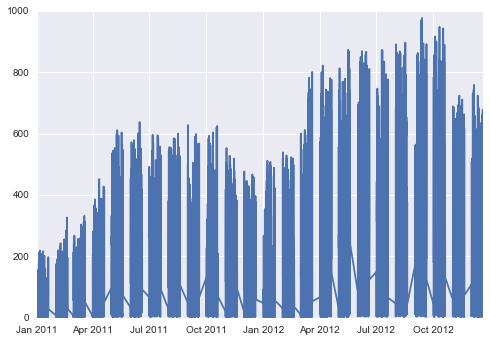

In [25]:
train2 = pd.read_csv(path1)
#plot_train_X = train2.drop(labels=['count'], axis=1).datetime
plot_train_X = pd.DatetimeIndex(train2['datetime'])
plot_train_y = train2['count']
plt.plot(plot_train_X, plot_train_y)